# Applied Data Science - Lab 1

## Import .csv function

In [2]:
def importcsv(filename):
    
    with open(filename, 'r') as csv:
        
        lst = []
        all_data = csv.readlines()
        
        for row in all_data:
            row = row.rstrip('\n')                 # clean \n
            csv_data = row.split(',')
            csv_data = [i.replace('ï»¿', '') for i in csv_data]
            csv_data = [k.replace(' 00:00:00', '') for k in csv_data]
            csv_data = [j.replace('"', '') for j in csv_data]

            lst.append((csv_data))
        
        return lst

In [3]:
filename1 = 'barometer-last-year.csv'
filename2 = 'indoor-temperature-last-year.csv'
filename3 = 'outside-temperature-last-year.csv'
filename4 = 'rainfall-last-year.csv'


baro_data = importcsv(filename1)
indoor_temp_data = importcsv(filename2)
outdoor_temp_data = importcsv(filename3)
rainfall_data = importcsv(filename4)

## Insert imported lists into pandas dataframes

In [4]:
import pandas as pd

baro = pd.DataFrame(baro_data[1:], columns=baro_data[0])
indoor = pd.DataFrame(indoor_temp_data[1:], columns=indoor_temp_data[0])
outdoor = pd.DataFrame(outdoor_temp_data[1:], columns=outdoor_temp_data[0])
rainfall = pd.DataFrame(rainfall_data[1:], columns=rainfall_data[0])


## Barometer

In [5]:
baro

,DateTime,Baro
0,2016-10-09,1021.9
1,2016-10-10,1019.9
2,2016-10-11,1015.8
3,2016-10-12,1013.2
4,2016-10-13,1005.9
...,...,...
350,2017-10-05,1010.6
351,2017-10-06,1019.2
352,2017-10-07,1011.5
353,2017-10-08,1013.1


## Indoor temperature

In [6]:
indoor

,DateTime,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
0,2016-10-09,54,21.93,21,22.8
1,2016-10-10,52,21.77,20.4,23.6
2,2016-10-11,51,21.36,19.9,23
3,2016-10-12,51,21.44,20,23.6
4,2016-10-13,52,21.22,20.1,22.3
...,...,...,...,...,...
349,2017-10-05,56,21.34,20.6,22.8
350,2017-10-06,54,21.34,20.3,22.3
351,2017-10-07,55,21.34,20.6,21.9
352,2017-10-08,55,21.81,20.6,23.5


## Outdoor temperature

In [7]:
outdoor

,DateTime,Temperature,Temperature_range (low),Temperature_range (high)
0,2016-10-09,10.66,7.2,13.8
1,2016-10-10,8.94,5.6,12.8
2,2016-10-11,8.69,5.3,14.3
3,2016-10-12,11.55,9,14.9
4,2016-10-13,9.4,6,13.3
...,...,...,...,...
350,2017-10-05,13.32,10,17.2
351,2017-10-06,11.58,7.2,17.6
352,2017-10-07,13.7,11.7,16.4
353,2017-10-08,13.6,9.6,21.7


## Rainfall

In [8]:
rainfall

,DateTime,mm
0,2016-10-09,0
1,2016-10-10,0
2,2016-10-11,0
3,2016-10-12,0
4,2016-10-13,0
...,...,...
348,2017-10-05,1
349,2017-10-06,0
350,2017-10-07,1.1
351,2017-10-08,0


In [9]:
table1 = pd.merge(baro, indoor, how='left', on='DateTime')
table2 = pd.merge(outdoor, rainfall, how='left', on='DateTime')
final_table = pd.merge(table1, table2, how='left', on='DateTime', suffixes=['_indoor', '_outdoor'])

final_table['Baro'] = pd.to_numeric(final_table['Baro'], downcast="float")
final_table['Humidity'] = pd.to_numeric(final_table['Humidity'], downcast="float")
final_table['Temperature_indoor'] = pd.to_numeric(final_table['Temperature_indoor'], downcast="float")
final_table['Temperature_range (low)_indoor'] = pd.to_numeric(final_table['Temperature_range (low)_indoor'], downcast="float")
final_table['Temperature_range (high)_indoor'] = pd.to_numeric(final_table['Temperature_range (high)_indoor'], downcast="float")
final_table['Temperature_outdoor'] = pd.to_numeric(final_table['Temperature_outdoor'], downcast="float")
final_table['Temperature_range (low)_outdoor'] = pd.to_numeric(final_table['Temperature_range (low)_outdoor'], downcast="float")
final_table['Temperature_range (high)_outdoor'] = pd.to_numeric(final_table['Temperature_range (high)_outdoor'], downcast="float")
final_table['mm'] = pd.to_numeric(final_table['mm'], downcast="float")

# styler

final_table_styler_df = final_table.style.set_precision(2)

## Table of weather component data

In [10]:
final_table_styler_df

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
0,2016-10-09,1021.90,54.00,21.93,21.00,22.80,10.66,7.20,13.80,0.00
1,2016-10-10,1019.90,52.00,21.77,20.40,23.60,8.94,5.60,12.80,0.00
2,2016-10-11,1015.80,51.00,21.36,19.90,23.00,8.69,5.30,14.30,0.00
3,2016-10-12,1013.20,51.00,21.44,20.00,23.60,11.55,9.00,14.90,0.00
4,2016-10-13,1005.90,52.00,21.22,20.10,22.30,9.40,6.00,13.30,0.00
5,2016-10-14,998.60,52.00,21.02,19.60,22.60,9.85,6.80,13.30,1.10
6,2016-10-15,998.00,53.00,21.40,20.30,22.50,10.72,8.20,14.70,2.10
7,2016-10-16,1002.20,53.00,21.43,20.00,23.00,11.28,7.80,14.50,8.40
8,2016-10-17,1009.80,53.00,21.67,20.50,22.70,11.84,10.00,15.00,1.10
9,2016-10-18,1013.40,54.00,21.75,20.60,23.10,10.24,8.20,12.70,3.10


Table 1. Weather components measured in a year

## Statistics of weather components

In [11]:
stats = final_table.describe().round(2)
stats

,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
count,355.00,354.00,354.00,354.00,354.00,355.00,355.00,355.00,353.00
mean,1010.00,48.52,21.83,20.56,23.53,11.14,7.87,15.52,1.55
std,9.87,5.19,2.06,2.41,1.70,5.36,4.88,7.03,3.32
min,979.60,37.00,18.04,14.90,19.70,-1.81,-4.10,1.50,0.00
25%,1004.85,44.00,20.35,18.73,22.50,7.39,4.35,10.25,0.00
50%,1010.50,48.00,21.71,20.60,23.20,10.96,8.00,15.10,0.00
75%,1016.05,52.00,22.71,21.90,24.10,15.05,12.05,19.85,1.10
max,1035.60,59.00,29.21,28.20,31.10,26.38,18.70,38.50,23.20


Table 2. Statistics of all the weather components measured.

## Correlations between individual weather components

In [12]:
weather_corr = final_table.corr().round(2)
weather_corr

,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
Baro,1.00,-0.20,-0.10,-0.14,-0.04,-0.16,-0.20,-0.09,-0.48
Humidity,-0.20,1.00,0.48,0.57,0.25,0.64,0.69,0.54,0.17
Temperature_indoor,-0.10,0.48,1.00,0.98,0.91,0.90,0.83,0.90,-0.02
Temperature_range (low)_indoor,-0.14,0.57,0.98,1.00,0.83,0.94,0.89,0.90,0.04
Temperature_range (high)_indoor,-0.04,0.25,0.91,0.83,1.00,0.73,0.64,0.78,-0.11
Temperature_outdoor,-0.16,0.64,0.90,0.94,0.73,1.00,0.95,0.95,0.02
Temperature_range (low)_outdoor,-0.20,0.69,0.83,0.89,0.64,0.95,1.00,0.84,0.08
Temperature_range (high)_outdoor,-0.09,0.54,0.90,0.90,0.78,0.95,0.84,1.00,-0.06
mm,-0.48,0.17,-0.02,0.04,-0.11,0.02,0.08,-0.06,1.00


Text(66.45312499999999, 0.5, 'Weather components')

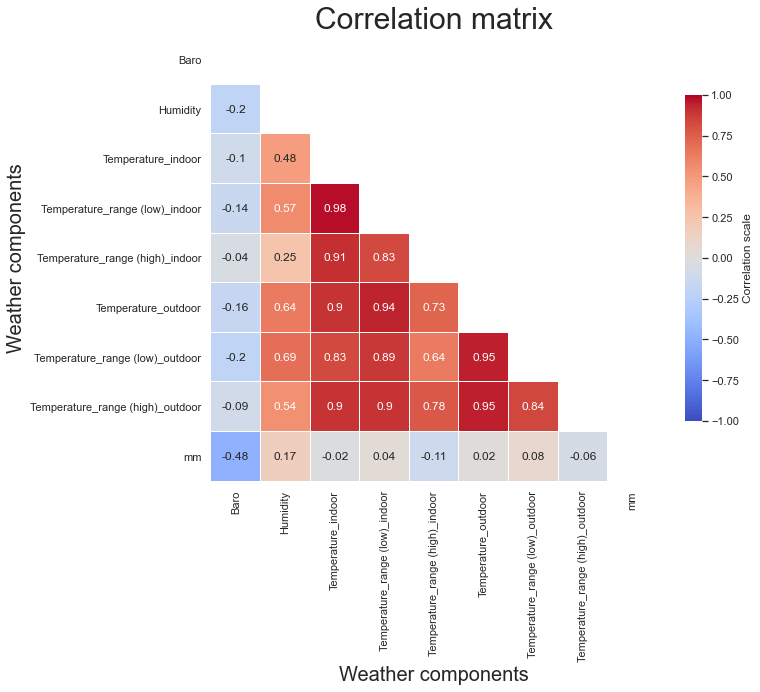

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(weather_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Draw the heatmap with the mask and correct aspect ratio
corr_hm = sns.heatmap(weather_corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, annot=True, linewidths=.1,  cbar_kws={'label': 'Correlation scale', 'shrink': 0.4})

corr_hm.set_title('Correlation matrix', size=30)
corr_hm.set_xlabel('Weather components', fontsize = 20)
corr_hm.set_ylabel('Weather components', fontsize = 20)


#corr_hm.set_xticklabels(corr_hm.get_xticklabels(), rotation=45)

Figure 1. The correlation matrix plotted against each other

The figure above is a correlation matrix where the weather components are plot against each other. The colour red means that there is a positive correlation between the components and the colour blue indicates a negative correlation. The gradient of the colour indicates the strength of the correlation, where a high gradient of red shows a strong positive correlation and a high gradient of blue means the strong negative correlation, as seen in the correlation scale. From the figure, there seems to be no correlation in the amount of rainfall versus all the other components. This is also seen in the air pressure measured from the barometer, as the correlation values are closed to naught.

## Weather component plot against each other (36 scatter plots)

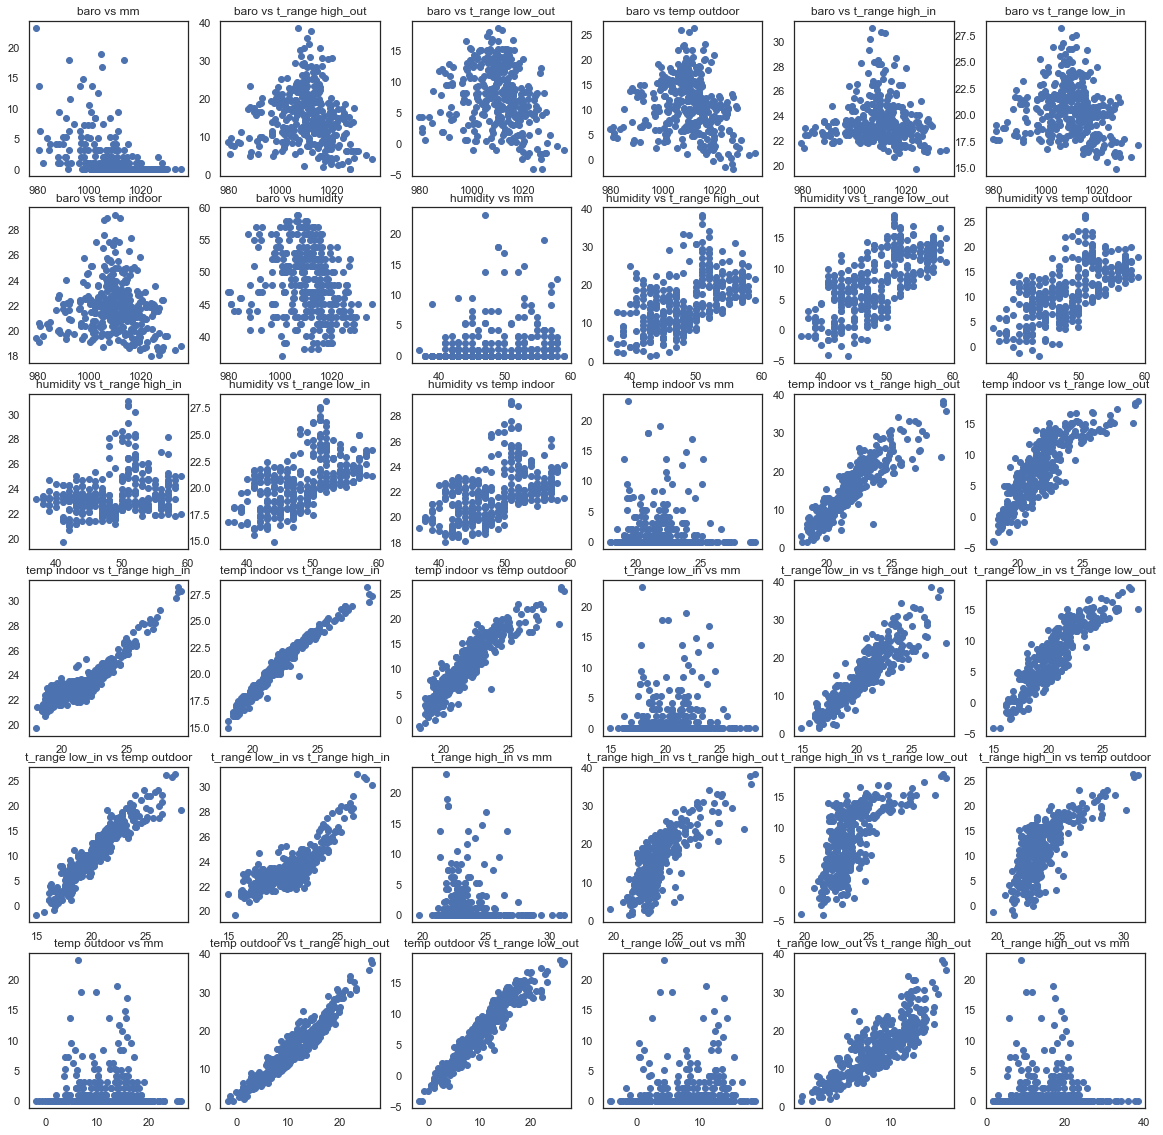

In [14]:
fig, ax = plt.subplots(6, 6, figsize=(20,20))

plt.subplot(6,6,1)
plt.scatter(final_table['Baro'], final_table['mm'])
plt.title('baro vs mm')

plt.subplot(6,6,2)
plt.scatter(final_table['Baro'], final_table['Temperature_range (high)_outdoor'])
plt.title('baro vs t_range high_out')

plt.subplot(6,6,3)
plt.scatter(final_table['Baro'], final_table['Temperature_range (low)_outdoor'])
plt.title("baro vs t_range low_out")

plt.subplot(6,6,4)
plt.scatter(final_table['Baro'], final_table['Temperature_outdoor'])
plt.title("baro vs temp outdoor")

plt.subplot(6,6,5)
plt.scatter(final_table['Baro'], final_table['Temperature_range (high)_indoor'])
plt.title("baro vs t_range high_in")

plt.subplot(6,6,6)
plt.scatter(final_table['Baro'], final_table['Temperature_range (low)_indoor'])
plt.title("baro vs t_range low_in")

plt.subplot(6,6,7)
plt.scatter(final_table['Baro'], final_table['Temperature_indoor'])
plt.title("baro vs temp indoor")

plt.subplot(6,6,8)
plt.scatter(final_table['Baro'], final_table['Humidity'])
plt.title("baro vs humidity")

plt.subplot(6,6,9)
plt.scatter(final_table['Humidity'], final_table['mm'])
plt.title("humidity vs mm")

plt.subplot(6,6,10)
plt.scatter(final_table['Humidity'], final_table['Temperature_range (high)_outdoor'])
plt.title("humidity vs t_range high_out")

plt.subplot(6,6,11)
plt.scatter(final_table['Humidity'], final_table['Temperature_range (low)_outdoor'])
plt.title("humidity vs t_range low_out")

plt.subplot(6,6,12)
plt.scatter(final_table['Humidity'], final_table['Temperature_outdoor'])
plt.title("humidity vs temp outdoor")

plt.subplot(6,6,13)
plt.scatter(final_table['Humidity'], final_table['Temperature_range (high)_indoor'])
plt.title("humidity vs t_range high_in")

plt.subplot(6,6,14)
plt.scatter(final_table['Humidity'], final_table['Temperature_range (low)_indoor'])
plt.title("humidity vs t_range low_in")

plt.subplot(6,6,15)
plt.scatter(final_table['Humidity'], final_table['Temperature_indoor'])
plt.title("humidity vs temp indoor")

plt.subplot(6,6,16)
plt.scatter(final_table['Temperature_indoor'], final_table['mm'])
plt.title("temp indoor vs mm")

plt.subplot(6,6,17)
plt.scatter(final_table['Temperature_indoor'], final_table['Temperature_range (high)_outdoor'])
plt.title("temp indoor vs t_range high_out")

plt.subplot(6,6,18)
plt.scatter(final_table['Temperature_indoor'], final_table['Temperature_range (low)_outdoor'])
plt.title("temp indoor vs t_range low_out")

plt.subplot(6,6,19)
plt.scatter(final_table['Temperature_indoor'], final_table['Temperature_range (high)_indoor'])
plt.title("temp indoor vs t_range high_in")

plt.subplot(6,6,20)
plt.scatter(final_table['Temperature_indoor'], final_table['Temperature_range (low)_indoor'])
plt.title("temp indoor vs t_range low_in")

plt.subplot(6,6,21)
plt.scatter(final_table['Temperature_indoor'], final_table['Temperature_outdoor'])
plt.title("temp indoor vs temp outdoor")

plt.subplot(6,6,22)
plt.scatter(final_table['Temperature_range (low)_indoor'], final_table['mm'])
plt.title("t_range low_in vs mm")

plt.subplot(6,6,23)
plt.scatter(final_table['Temperature_range (low)_indoor'], final_table['Temperature_range (high)_outdoor'])
plt.title("t_range low_in vs t_range high_out")

plt.subplot(6,6,24)
plt.scatter(final_table['Temperature_range (low)_indoor'], final_table['Temperature_range (low)_outdoor'])
plt.title("t_range low_in vs t_range low_out")

plt.subplot(6,6,25)
plt.scatter(final_table['Temperature_range (low)_indoor'], final_table['Temperature_outdoor'])
plt.title("t_range low_in vs temp outdoor")

plt.subplot(6,6,26)
plt.scatter(final_table['Temperature_range (low)_indoor'], final_table['Temperature_range (high)_indoor'])
plt.title("t_range low_in vs t_range high_in")

plt.subplot(6,6,27)
plt.scatter(final_table['Temperature_range (high)_indoor'], final_table['mm'])
plt.title("t_range high_in vs mm")

plt.subplot(6,6,28)
plt.scatter(final_table['Temperature_range (high)_indoor'], final_table['Temperature_range (high)_outdoor'])
plt.title("t_range high_in vs t_range high_out")

plt.subplot(6,6,29)
plt.scatter(final_table['Temperature_range (high)_indoor'], final_table['Temperature_range (low)_outdoor'])
plt.title("t_range high_in vs t_range low_out")

plt.subplot(6,6,30)
plt.scatter(final_table['Temperature_range (high)_indoor'], final_table['Temperature_outdoor'])
plt.title("t_range high_in vs temp outdoor")

plt.subplot(6,6,31)
plt.scatter(final_table['Temperature_outdoor'], final_table['mm'])
plt.title("temp outdoor vs mm")

plt.subplot(6,6,32)
plt.scatter(final_table['Temperature_outdoor'], final_table['Temperature_range (high)_outdoor'])
plt.title("temp outdoor vs t_range high_out")

plt.subplot(6,6,33)
plt.scatter(final_table['Temperature_outdoor'], final_table['Temperature_range (low)_outdoor'])
plt.title("temp outdoor vs t_range low_out")

plt.subplot(6,6,34)
plt.scatter(final_table['Temperature_range (low)_outdoor'], final_table['mm'])
plt.title("t_range low_out vs mm")

plt.subplot(6,6,35)
plt.scatter(final_table['Temperature_range (low)_outdoor'], final_table['Temperature_range (high)_outdoor'])
plt.title("t_range low_out vs t_range high_out")

plt.subplot(6,6,36)
plt.scatter(final_table['Temperature_range (high)_outdoor'], final_table['mm'])
plt.title("t_range high_out vs mm")

plt.show()


# Task 2

## NaN values

In [15]:
is_NaN = final_table.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = final_table[row_has_NaN]

rows_with_NaN

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
73,2016-12-22,1019.599976,47.0,19.559999,17.6,21.700001,4.84,1.7,7.9,NaN
218,2017-05-17,1009.500000,48.0,22.200001,21.6,23.000000,12.67,9.7,14.5,NaN
284,2017-07-22,999.400024,NaN,NaN,NaN,NaN,14.36,10.6,18.5,1.0


## Replace NaN values with 0

In [16]:
final_table = final_table.fillna(0)

final_table[final_table.Humidity == 0]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
284,2017-07-22,999.400024,0.0,0.0,0.0,0.0,14.36,10.6,18.5,1.0


## Find maximum values for timeline infographic

In [17]:
final_table[final_table.Baro == final_table.Baro.max()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
78,2016-12-27,1035.599976,45.0,18.790001,17.200001,21.299999,1.49,-0.9,4.2,0.0


In [18]:
final_table[final_table.Humidity == final_table.Humidity.max()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
307,2017-08-23,1006.700012,59.0,24.129999,23.6,25.0,17.92,14.9,21.700001,0.0
347,2017-10-02,1006.599976,59.0,21.540001,21.1,22.0,13.94,11.1,16.100000,0.0


In [19]:
final_table[final_table.Temperature_outdoor == final_table.Temperature_outdoor.max()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
251,2017-06-19,1011.900024,51.0,28.969999,27.6,30.700001,26.379999,18.4,37.799999,0.0


In [20]:
final_table[final_table.mm == final_table.mm.max()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
43,2016-11-21,979.599976,47.0,19.43,17.799999,21.799999,6.27,4.3,8.6,23.200001


## Minimum value values for timeline infographic

In [21]:
final_table[final_table.Baro == final_table.Baro.min()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
43,2016-11-21,979.599976,47.0,19.43,17.799999,21.799999,6.27,4.3,8.6,23.200001


In [22]:
final_table[final_table.Humidity == final_table.Humidity.min()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
284,2017-07-22,999.400024,0.0,0.0,0.0,0.0,14.36,10.6,18.5,1.0


In [23]:
final_table[final_table.Temperature_outdoor == final_table.Temperature_outdoor.min()]

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
52,2016-11-30,1027.099976,44.0,18.110001,14.9,21.4,-1.81,-4.1,1.6,0.0


## Seasonal values

In [24]:
final_table['DateTime'] = pd.to_datetime(final_table['DateTime'], format='%Y-%m-%d')

In [25]:
autumn1 = (final_table['DateTime'] >= '2016-09') & (final_table['DateTime'] < '2016-12')
winter = (final_table['DateTime'] >= '2016-12') & (final_table['DateTime'] < '2017-03')
spring = (final_table['DateTime'] >=  '2017-04') & (final_table['DateTime'] < '2017-06')
summer = (final_table['DateTime'] >=  '2017-06') & (final_table['DateTime'] < '2017-09')
autumn2 = (final_table['DateTime'] >=  '2017-09')

autumn16 = final_table[autumn1]
winter1617 = final_table[winter]
spring17 = final_table[spring]
summer17 = final_table[summer]
autumn17 = final_table[autumn2]

# styler

autumn16_s = autumn16.style.set_precision(2)
winter1617_s = winter1617.style.set_precision(2)
spring17_s = spring17.style.set_precision(2)
summer17_s = summer17.style.set_precision(2)
autumn17_s = autumn17.style.set_precision(2)

## To check if the seasonal values is working...

In [26]:
summer17_s

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
233,2017-06-01 00:00:00,1012.70,51.00,23.82,22.80,25.30,18.63,12.00,27.00,0.00
234,2017-06-02 00:00:00,1009.10,51.00,24.48,24.10,24.90,16.62,13.20,21.60,1.00
235,2017-06-03 00:00:00,1008.30,51.00,24.38,23.50,25.60,14.56,9.10,20.40,0.00
236,2017-06-04 00:00:00,1008.40,50.00,23.85,23.30,24.60,13.93,10.80,18.10,2.10
237,2017-06-05 00:00:00,996.70,50.00,22.33,21.50,23.60,12.43,10.50,13.80,13.70
238,2017-06-06 00:00:00,990.00,51.00,21.77,21.10,22.50,12.59,9.50,17.70,5.30
239,2017-06-07 00:00:00,1004.20,50.00,21.97,20.70,22.70,14.07,10.50,19.50,0.00
240,2017-06-08 00:00:00,1000.50,51.00,22.14,21.80,22.60,14.63,12.40,20.00,5.20
241,2017-06-09 00:00:00,1003.50,51.00,22.66,21.60,23.90,14.84,10.50,20.10,0.00
242,2017-06-10 00:00:00,1007.00,52.00,23.14,22.50,23.80,16.96,13.50,22.10,2.10


## Statistics of seasonal values

In [27]:
stats_aut16 = autumn16.describe().round(2)
stats_win1617 = winter1617.describe().round(2)
stats_spr17 = spring17.describe().round(2)
stats_sum17 = summer17.describe().round(2)
stats_aut17 = autumn17.describe().round(2)

## Stat checking for seasonal values...

In [28]:
stats_aut17

,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
count,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00,39.00
mean,1007.27,55.31,21.93,21.19,22.83,13.92,10.76,18.53,1.95
std,7.80,1.75,0.53,0.62,0.75,1.55,2.27,2.24,2.58
min,987.40,52.00,20.87,20.10,21.80,11.15,7.00,13.60,0.00
25%,1004.50,54.00,21.49,20.60,22.30,12.63,9.00,17.05,0.00
50%,1009.90,55.00,21.90,21.20,22.60,13.70,10.90,18.70,1.10
75%,1012.65,57.00,22.24,21.65,23.40,15.13,12.60,19.50,2.65
max,1019.20,59.00,23.26,22.30,24.70,17.72,15.20,23.80,11.60


## Mean of seasonal values in different weather components w/ graphs and charts
The values for autumn 2016 and autumn 2017 are merged together

## Humidity

In [29]:
h = 'Humidity'

# mean values of seasonal humidity values

mean_autumn16 = autumn16[h].mean()
mean_autumn17 = autumn17[h].mean()


mean_autumn = (mean_autumn16 + mean_autumn17)/2
mean_winter = winter1617[h].mean()
mean_spring = spring17[h].mean()
mean_summer = summer17[h].mean()

seasonal_hum_lst = [mean_autumn, mean_winter, mean_spring, mean_summer]

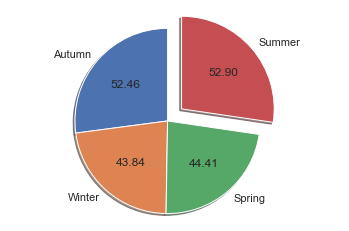

In [30]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Autumn', 'Winter', 'Spring', 'Summer'
sizes = seasonal_hum_lst
total = sum(sizes)
explode = (0, 0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda p: '{:.2f}'.format(p * total / 100),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

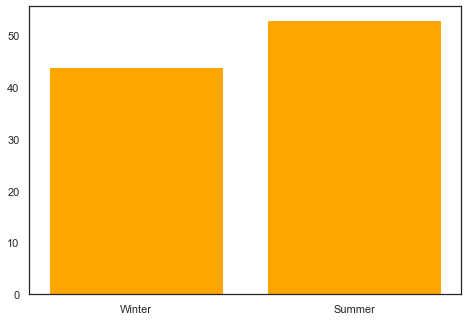

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
seasonal_hum_lst = [mean_winter, mean_summer]
labels = 'Winter', 'Summer'
ax.bar(labels,seasonal_hum_lst, color = 'orange')
plt.show()

In [32]:
seasonal_hum_lst

[43.84269714355469, 52.90361404418945]

In [33]:
seasonal_hum_lst[1] - seasonal_hum_lst[0]

9.060916900634766

## Temperature outdoor

In [34]:
to = 'Temperature_outdoor'

# mean values of seasonal temp outdoor values

mean_autumn16 = autumn16[to].mean()
mean_autumn17 = autumn17[to].mean()


mean_autumn = (mean_autumn16 + mean_autumn17)/2
mean_winter = winter1617[to].mean()
mean_spring = spring17[to].mean()
mean_summer = summer17[to].mean()

seasonal_to_lst = [mean_spring, mean_summer, mean_autumn, mean_winter ]

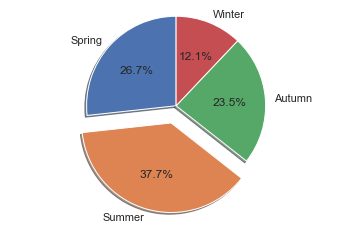

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =  'Spring', 'Summer','Autumn', 'Winter'
sizes = seasonal_to_lst
explode = (0, 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

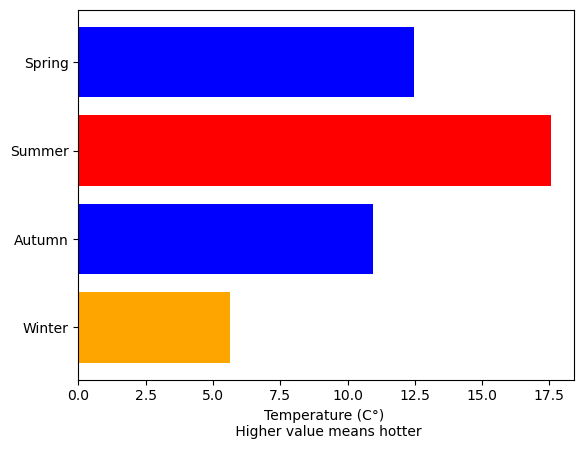

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
sizes = 'Spring', 'Summer', 'Autumn', 'Winter'
y_pos = np.arange(len(sizes))
performance = seasonal_to_lst

ax.barh(y_pos, performance, align='center', color = ['blue', 'red', 'blue', 'orange'])
ax.set_yticks(y_pos)
ax.set_yticklabels(sizes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Temperature (C°) \n Higher value means hotter')

plt.show()

In [37]:
seasonal_to_lst

[12.453280448913574, 17.557832717895508, 10.96485185623169, 5.6233696937561035]

## Rainfall

In [43]:
rain = 'mm'

# mean values of seasonal rainfall values

mean_autumn16 = autumn16[rain].mean()
mean_autumn17 = autumn17[rain].mean()


mean_autumn = (mean_autumn16 + mean_autumn17)/2
mean_winter = winter1617[rain].mean()
mean_spring = spring17[rain].mean()
mean_summer = summer17[rain].mean()

seasonal_rain_lst = [mean_autumn, mean_winter, mean_spring, mean_summer]

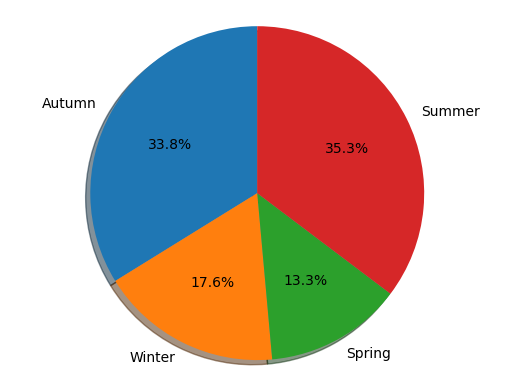

In [44]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Autumn', 'Winter', 'Spring', 'Summer'
sizes = seasonal_rain_lst
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

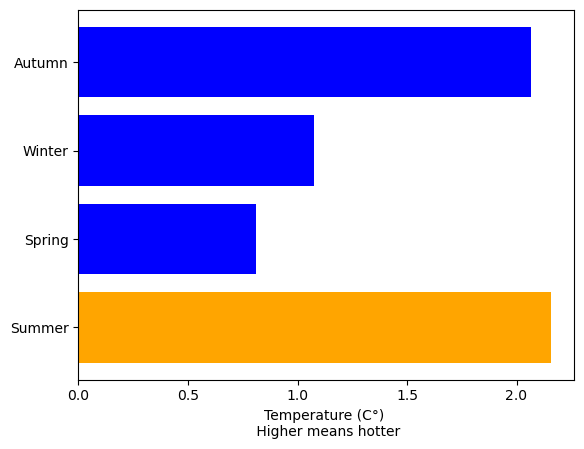

In [95]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
sizes = 'Autumn', 'Winter', 'Spring', 'Summer'
y_pos = np.arange(len(sizes))
performance = seasonal_rain_lst

ax.barh(y_pos, performance, align='center', color = ['blue', 'blue', 'blue', 'orange'])
ax.set_yticks(y_pos)
ax.set_yticklabels(sizes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Temperature (C°) \n Higher means hotter')

plt.show()

## Monthly values

In [96]:
oct16 = (final_table['DateTime'] >= '2016-10') & (final_table['DateTime'] < '2016-11')
nov16 = (final_table['DateTime'] >= '2016-11') & (final_table['DateTime'] < '2016-12')
dec16 = (final_table['DateTime'] >= '2016-12') & (final_table['DateTime'] < '2017-01')
jan17 = (final_table['DateTime'] >= '2017-01') & (final_table['DateTime'] < '2017-02')
feb17 = (final_table['DateTime'] >= '2017-02') & (final_table['DateTime'] < '2017-03')
mar17 = (final_table['DateTime'] >= '2017-03') & (final_table['DateTime'] < '2017-04')
apr17 = (final_table['DateTime'] >= '2017-04') & (final_table['DateTime'] < '2017-05')
may17 = (final_table['DateTime'] >= '2017-05') & (final_table['DateTime'] < '2017-06')
jun17 = (final_table['DateTime'] >= '2017-06') & (final_table['DateTime'] < '2017-07')
jul17 = (final_table['DateTime'] >= '2017-07') & (final_table['DateTime'] < '2017-08')
aug17 = (final_table['DateTime'] >= '2017-08') & (final_table['DateTime'] < '2017-09')
sep17 = (final_table['DateTime'] >= '2017-09') & (final_table['DateTime'] < '2017-10')
oct17 = (final_table['DateTime'] >= '2017-10')

oct16 = final_table[oct16]
nov16 = final_table[nov16]
dec16 = final_table[dec16]
jan17 = final_table[jan17]
feb17 = final_table[feb17]
mar17 = final_table[mar17]
apr17 = final_table[apr17]
may17 = final_table[may17]
jun17 = final_table[jun17]
jul17 = final_table[jul17]
aug17 = final_table[aug17]
sep17 = final_table[sep17]
oct17 = final_table[oct17]

# styler

oct16_s = oct16.style.set_precision(2)
nov16_s = nov16.style.set_precision(2)
dec16_s = dec16.style.set_precision(2)
jan17_s = jan17.style.set_precision(2)
feb17_s = feb17.style.set_precision(2)
mar17_s = mar17.style.set_precision(2)
apr17_s = apr17.style.set_precision(2)
may17_s = may17.style.set_precision(2)
jun17_s = jun17.style.set_precision(2)
jul17_s = jul17.style.set_precision(2)
aug17_s = aug17.style.set_precision(2)
sep17_s = sep17.style.set_precision(2)
oct17_s = oct17.style.set_precision(2)

## To check if the monthly value is working...

In [97]:
apr17_s

,DateTime,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
172,2017-04-01 00:00:00,1001.50,47.00,22.33,20.80,23.80,10.96,8.00,16.70,1.00
173,2017-04-02 00:00:00,1014.70,47.00,22.16,20.60,23.70,10.07,6.20,17.00,0.00
174,2017-04-03 00:00:00,1016.80,47.00,21.93,20.80,23.10,10.23,4.80,15.40,0.00
175,2017-04-04 00:00:00,1019.10,47.00,21.87,20.70,23.10,11.31,6.80,14.70,0.00
176,2017-04-05 00:00:00,1024.70,46.00,21.80,20.30,23.50,9.42,4.10,16.20,0.00
177,2017-04-06 00:00:00,1023.70,44.00,21.87,20.00,23.50,9.89,4.60,17.20,0.00
178,2017-04-07 00:00:00,1019.60,44.00,22.33,20.80,24.20,10.64,4.70,18.40,0.00
179,2017-04-08 00:00:00,1015.30,44.00,22.84,20.80,24.70,12.29,5.00,22.40,0.00
180,2017-04-09 00:00:00,1012.70,45.00,23.06,21.70,24.80,12.85,7.30,20.80,0.00
181,2017-04-10 00:00:00,1018.90,45.00,22.84,21.60,24.00,11.09,8.10,15.90,0.00


## Statistics of monthly values

In [98]:
stats_oct16 = oct16.describe().round(2)
stats_nov16 = nov16.describe().round(2)
stats_dec16 = dec16.describe().round(2)
stats_jan17 = jan17.describe().round(2)
stats_feb17 = feb17.describe().round(2)
stats_mar17 = mar17.describe().round(2)
stats_apr17 = apr17.describe().round(2)
stats_may17 = may17.describe().round(2)
stats_jun17 = jun17.describe().round(2)
stats_jul17 = jul17.describe().round(2)
stats_aug17 = aug17.describe().round(2)
stats_sep17 = sep17.describe().round(2)
stats_oct17 = oct17.describe().round(2)

## Checking if stats is working...

In [99]:
stats_dec16

,Baro,Humidity,Temperature_indoor,Temperature_range (low)_indoor,Temperature_range (high)_indoor,Temperature_outdoor,Temperature_range (low)_outdoor,Temperature_range (high)_outdoor,mm
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,1018.78,45.87,19.73,18.04,21.86,6.22,3.77,8.54,0.91
std,6.59,3.05,1.16,1.35,1.04,3.54,3.87,3.10,3.31
min,1009.20,41.00,18.04,15.60,19.70,-1.26,-4.00,3.00,0.00
25%,1015.45,42.25,18.84,17.13,21.32,3.27,1.07,6.15,0.00
50%,1017.05,47.00,19.59,17.90,21.70,6.27,3.95,8.95,0.00
75%,1021.77,48.00,20.37,19.08,22.10,8.67,5.60,10.90,0.00
max,1035.60,50.00,23.57,20.40,25.20,12.44,11.80,13.20,17.90


## Monthly graphs and charts

In [100]:
col = 'Humidity'

oct16_mean = oct16[col].mean()
nov16_mean = nov16[col].mean()
dec16_mean = dec16[col].mean()
jan17_mean = jan17[col].mean()
feb17_mean = feb17[col].mean()
mar17_mean = mar17[col].mean()
apr17_mean = apr17[col].mean()
may17_mean = may17[col].mean()
jun17_mean = jun17[col].mean()
jul17_mean = jul17[col].mean()
aug17_mean = aug17[col].mean()
sep17_mean = sep17[col].mean()
oct17_mean = oct17[col].mean()

monthly_hum_lst = [oct16_mean, nov16_mean, dec16_mean, jan17_mean, feb17_mean, mar17_mean, 
                     apr17_mean, may17_mean, jun17_mean, jul17_mean, aug17_mean, sep17_mean,
                     oct17_mean]

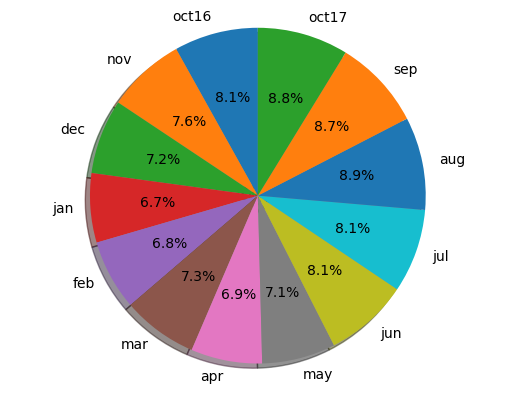

In [101]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'oct16', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct17'
sizes = monthly_hum_lst
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [102]:
col = 'mm'

jun17_mean = jun17[col].mean()
jul17_mean = jul17[col].mean()
aug17_mean = aug17[col].mean()

monthly_summ_lst = [jun17_mean, jul17_mean, aug17_mean]

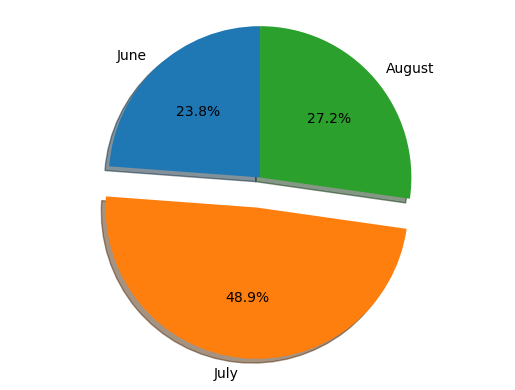

In [103]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'June', 'July', 'August'
sizes = monthly_summ_lst
explode = (0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [104]:
col = 'mm'

oct16_mean = oct16[col].mean()
nov16_mean = nov16[col].mean()
dec16_mean = dec16[col].mean()
jan17_mean = jan17[col].mean()
feb17_mean = feb17[col].mean()
mar17_mean = mar17[col].mean()
apr17_mean = apr17[col].mean()
may17_mean = may17[col].mean()
jun17_mean = jun17[col].mean()
jul17_mean = jul17[col].mean()
aug17_mean = aug17[col].mean()
sep17_mean = sep17[col].mean()
oct17_mean = oct17[col].mean()

monthly_rain_lst = [oct16_mean, nov16_mean, dec16_mean, jan17_mean, feb17_mean, mar17_mean, 
                     apr17_mean, may17_mean, jun17_mean, jul17_mean, aug17_mean, sep17_mean,
                     oct17_mean]

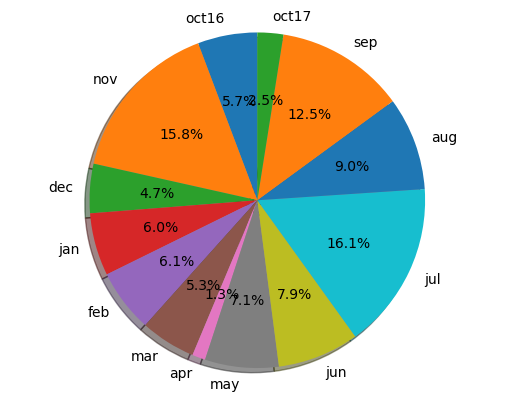

In [105]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'oct16', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct17'
sizes = monthly_rain_lst
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [106]:
col = 'Temperature_outdoor'

oct16_mean = oct16[col].mean()
nov16_mean = nov16[col].mean()
dec16_mean = dec16[col].mean()
jan17_mean = jan17[col].mean()
feb17_mean = feb17[col].mean()
mar17_mean = mar17[col].mean()
apr17_mean = apr17[col].mean()
may17_mean = may17[col].mean()
jun17_mean = jun17[col].mean()
jul17_mean = jul17[col].mean()
aug17_mean = aug17[col].mean()
sep17_mean = sep17[col].mean()
oct17_mean = oct17[col].mean()

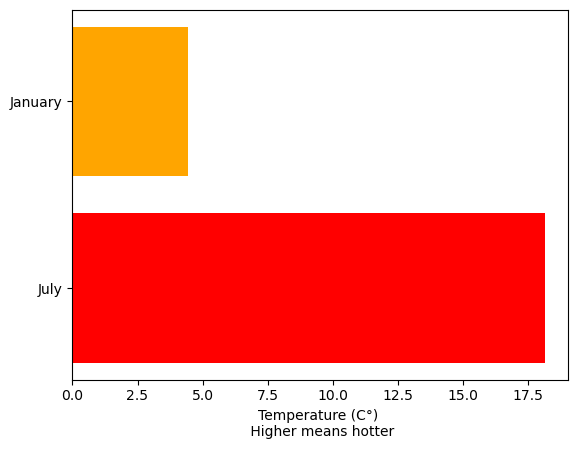

In [107]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
sizes = 'January', 'July'
y_pos = np.arange(len(sizes))

temp = [jan17_mean, jul17_mean]
performance = temp

ax.barh(y_pos, performance, align='center', color = ['orange', 'red'])
ax.set_yticks(y_pos)
ax.set_yticklabels(sizes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Temperature (C°) \n Higher means hotter')

plt.show()

In [108]:
col = 'Humidity'

oct16_mean = oct16[col].mean()
nov16_mean = nov16[col].mean()
dec16_mean = dec16[col].mean()
jan17_mean = jan17[col].mean()
feb17_mean = feb17[col].mean()
mar17_mean = mar17[col].mean()
apr17_mean = apr17[col].mean()
may17_mean = may17[col].mean()
jun17_mean = jun17[col].mean()
jul17_mean = jul17[col].mean()
aug17_mean = aug17[col].mean()
sep17_mean = sep17[col].mean()
oct17_mean = oct17[col].mean()

monthly_hum_lst = [jan17_mean, aug17_mean]

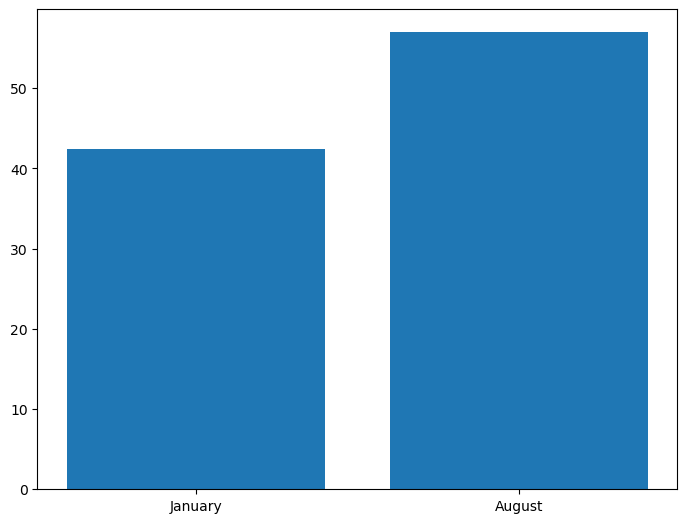

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = 'January','August'
ax.bar(labels,monthly_hum_lst)
plt.show()

In [110]:
monthly_hum_lst

[42.48387145996094, 57.0]

In [111]:
monthly_hum_lst[1] - monthly_hum_lst[0]

14.516128540039062